Neste exemplo treinamos e avaliamos um modelo preditivo usando **T-fold-CrossValidation**, ou Validação Cruzada com T Pastas

- técnica de aprendizagem usada: Árvore de Decisão
- tarefa supervisionada: classificação de vinhos
- métricas de avaliação: taxa de acerto, precisão, revocação, f1 e matriz de confusão

Importando os recursos necessários:
- numpy: biblioteca numérica
- sklearn: biblioteca de machine learning, em especial a técnica Decision Tree, as métricas de avaliação e o model_selection que nos permite executar validação cruzada

In [1]:
# Importa bibliotecas necessárias 
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.datasets import load_wine


Carregando a base de dados do problema, representada aqui por X e y, onde:
- X: array contendo N instâncias com M atributos (atributos de entrada do problema)
- y: array contendo o rótulo (atributo alvo) de cada instância em X


In [2]:
# Neste exemplo a base de dados wine é composto por 178 instâncias (N=178), 
# e cada instância é representada por um vetor de 13 atributos (M=13).

X, y = load_wine(return_X_y=True)
print("Formato de X: ", X.shape)
print("Formato de y: ", y.shape)

Formato de X:  (178, 13)
Formato de y:  (178,)


Neste ponto definimos a técnica de Machine Learning a ser utilizada e treinamos o modelo usando Validação Cruzada. No exemplo, uma árvore de decisão. 

Observer que, diferente do HOLDOUT, não usamos a função *fit()* e sim *model_selection.cross_val_score()*. Esta função irá treinar T modelos. A cada iteração treina usando T-1 pastas e testa com uma delas. Troca a pasta de teste a cada iteração. Ao final fornece como resultado acurácia média + desvio padrão.

OBS: protocolo muito mais robusto que o HOLDOUT, pois cada instância do problema será teste em alguma iteração.

In [3]:
# Definindo a técnica a ser utilizada
#clf = KNeighborsClassifier(n_neighbors=3)
clf = DecisionTreeClassifier()

# Usando a validação cruzada com 10 folds neste exemplo.
T=10 # número de pastas ou folds
result = model_selection.cross_val_score(clf, X, y, cv=T)




Avaliação do modelo abaixo:

- A variável *result* que criamos anteriormente já tem a taxa de acerto média e desvio padrão calculadas pela função *model_selection.cross_val_score()*.

- A função *model_selection.cross_val_predict()* retorna a classe para cada exemplo de teste.

- A função *model_selection.cross_val_predict()* com parâmetro '*method=predict_proba*' retorna a probabilidade de cada classe para cada exemplo de teste.

Considerando tp=true positivive, fp=false positive e fn=false negative.

- A função *precision_score()*: calcula tp / (tp + fp)

- A função *recall_score()* calcula: tp / (tp + fn)

- A função *f1_score()* calcula a média harmônica entre *precision* e *recall*.

- A função *confusion_matrix()* recebe como entrada os rótulos do teste (y_test) e a predição do modelo (y_pred). Ela retorna uma matriz CxC onde C é a quandidade de classes. No exemplo C=3, logo uma matriz 3x3 onde na diagonal temos os acertos e nas demais posições as confusões entre as classes do problema. A matriz de confusão é usada para avaliar classificador apenas e muito importante para analisarmos os erros do nosso modelo (ou hipótese de solução para o problema).  


In [4]:

# Mostrando a acurácia média e desvio padrão.
print("\nCross Validation Results %d folds:" % T)
print("Mean Accuracy: %.5f" % result.mean())
print("Mean Std: %.5f" % result.std())

# Calculando a predição para exemplo de teste
y_pred = model_selection.cross_val_predict(clf, X, y, cv=T)

# Calculando para cada instância de teste a probabilidade de cada classe
predicted_proba=model_selection.cross_val_predict(clf, X, y, cv=T, method='predict_proba')

# Calculando a precisão na base de teste
precision=precision_score(y, y_pred, average='weighted')
print("Precision = %.3f " % precision)

# Calculando a revocação na base de teste
recall=recall_score(y, y_pred, average='weighted')
print("Recall = %.3f " % recall)

# Calculando f1 na base de teste
f1=f1_score(y, y_pred, average='weighted')
print("F1 = %.3f " % f1)

# Exemplo mostrando o resultado previsto para a primeira instância de teste
print("Primeira instância na base de teste foi considerada como da classe: %d" % y_pred[0])

# Exemplo abaixo mostrando para a primeira instância de teste a probabilidade de cada classe
print("Probabilidade de cada classe para a primeira instância: ", predicted_proba[0])

# Calculando a matriz de confusão
print("Matriz de Confusão:")
matrix = confusion_matrix(y, y_pred)
print(matrix)

# salvando o modelo 
from joblib import dump, load
with open("KNN.mod", 'wb') as fo:  
    dump(clf, fo)


Cross Validation Results 10 folds:
Mean Accuracy: 0.87614
Mean Std: 0.07105
Precision = 0.860 
Recall = 0.860 
F1 = 0.859 
Primeira instância na base de teste foi considerada como da classe: 0
Probabilidade de cada classe para a primeira instância:  [1. 0. 0.]
Matriz de Confusão:
[[55  4  0]
 [ 8 58  5]
 [ 1  7 40]]


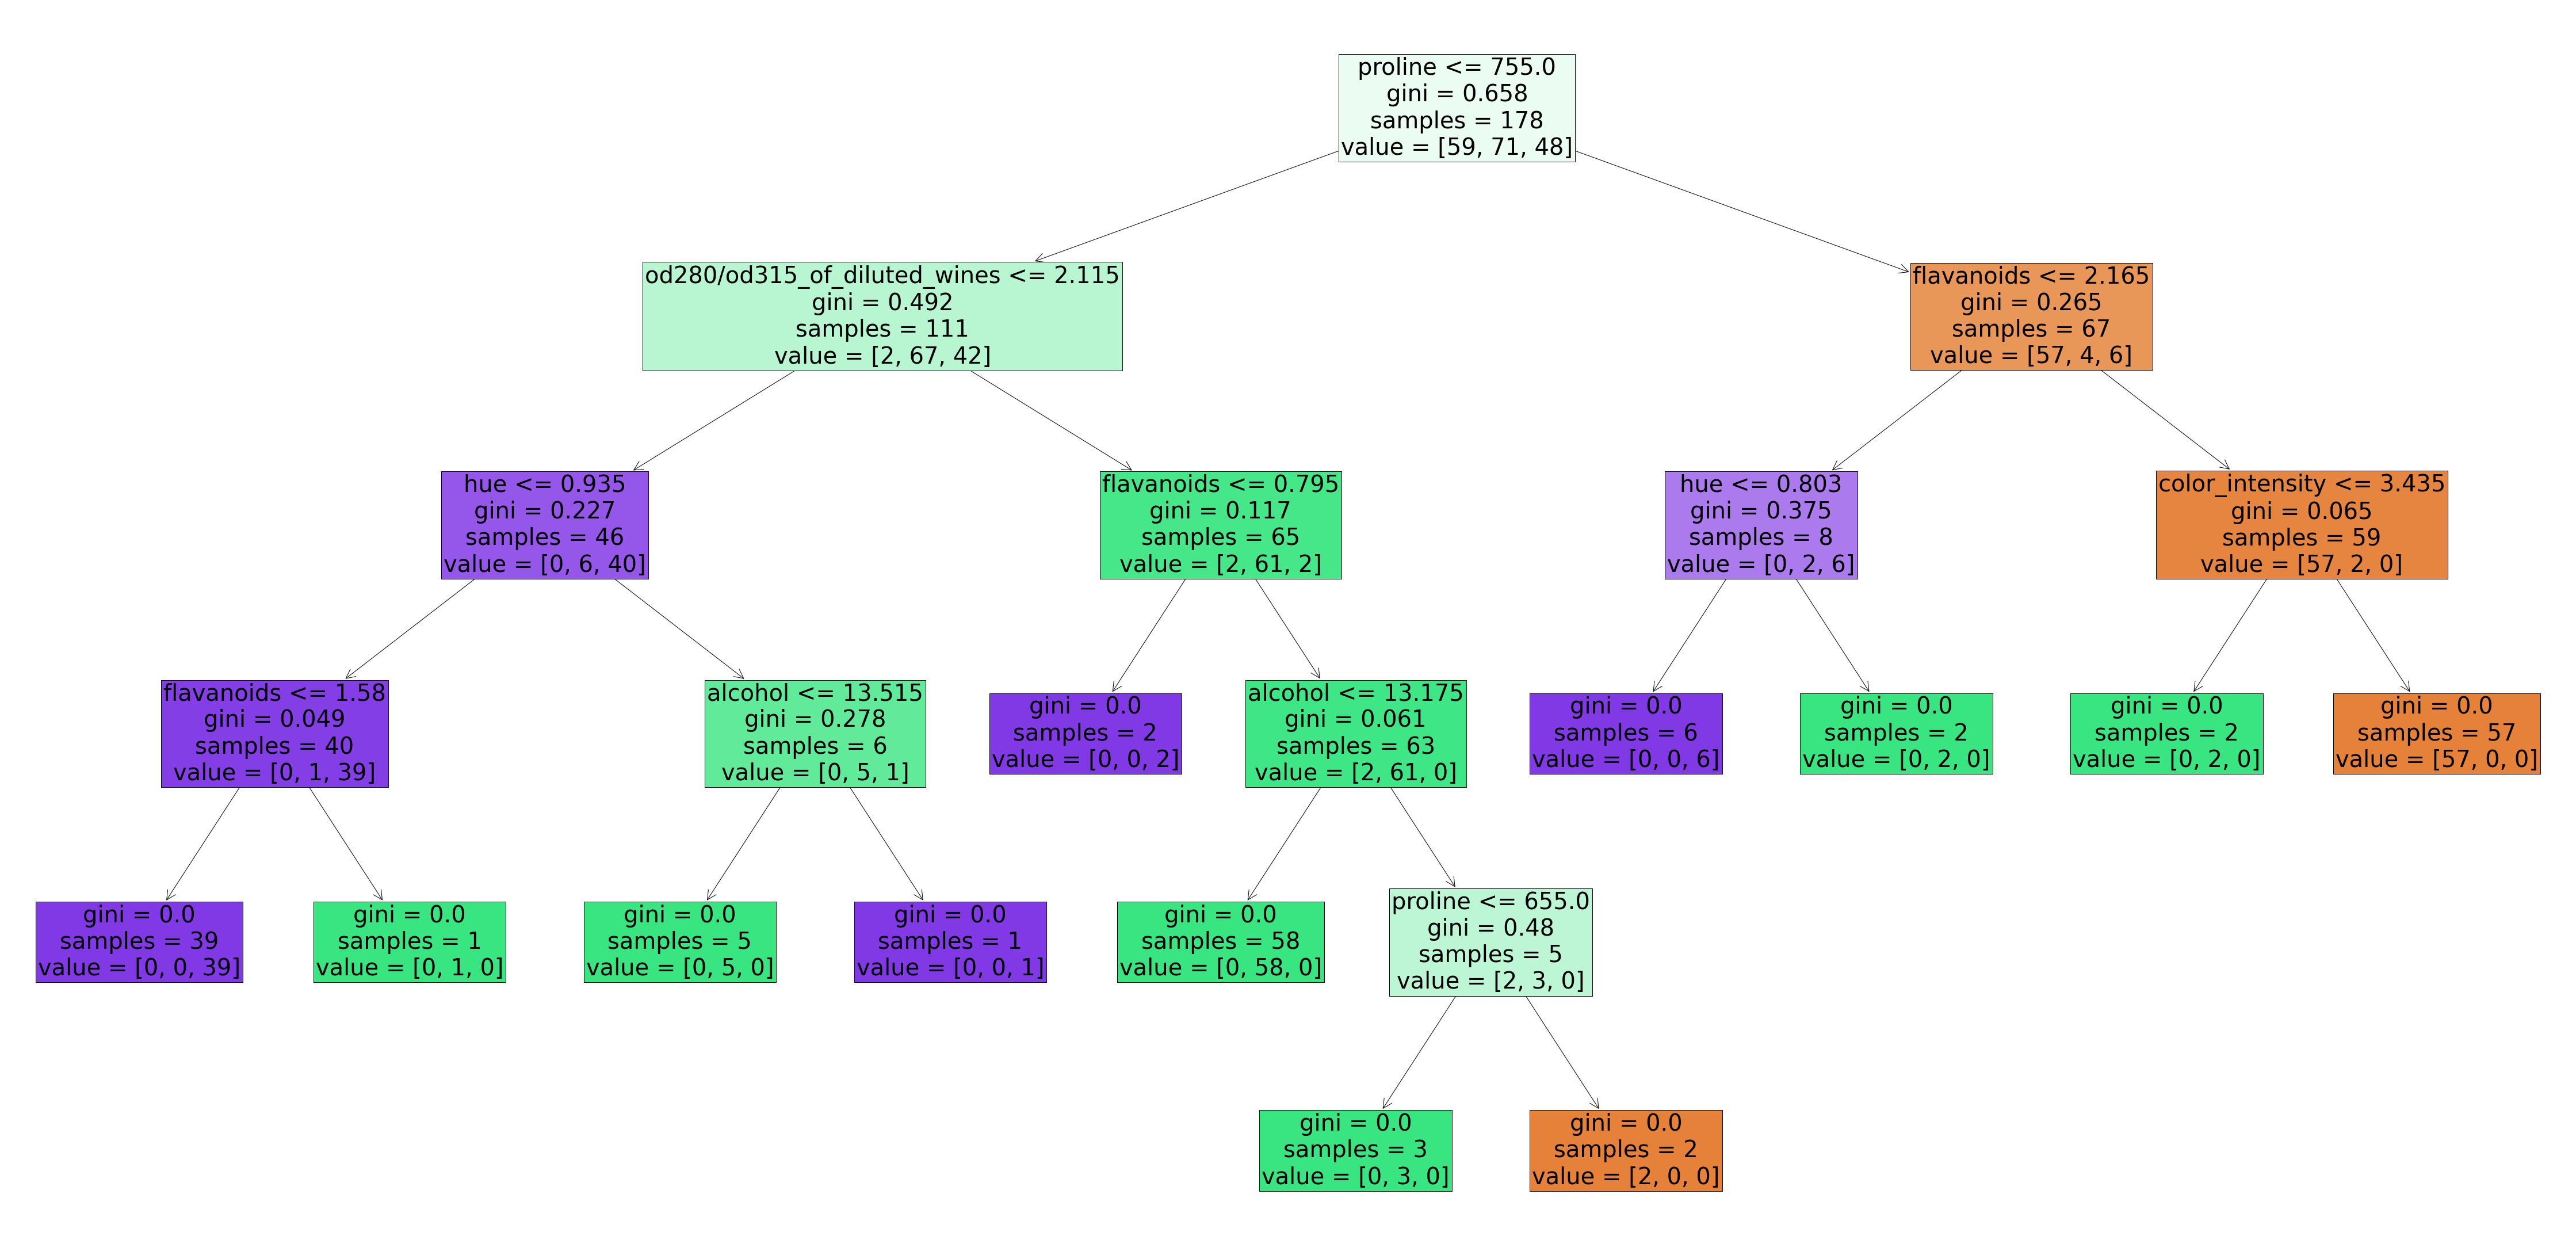

In [5]:
# plotando a árvore
from sklearn import tree
clf = DecisionTreeClassifier()
clf.fit(X,y)

import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
data=load_wine()

_, ax = plt.subplots(figsize=(80,40))
x=tree.plot_tree(clf, feature_names=data.feature_names, filled=True, ax=ax, fontsize=40)


